In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def f(x):
    return np.sin(x) - x**2

In [28]:
def incremental_search( xmin, xmax, step=.01):
    """
    incsearch: incremental search locator
        incsearch(func,xmin,xmax,ns)
        finds brackets of x that contain sign changes in
        a function of x on an interval
    input: 
        func = name of the function
        xmin, xmax = endpoints of the interval
        ns = number of subintervals, default value = 50
    output:  a tuple containing
        nb = number of bracket pairs found
        xb = list of bracket pair values
        or returns "no brackets found"
    """

    def func(x):
        return math.sin(x) - x**2
    
    x = np.arange(xmin, xmax, step)  # create array of x values
    f = []  # build array of corresponding function values
    for k in range(len(x)-1):
        f.append(func(x[k]))
    nb = 0
    xb = []
    for k in range(len(x) - 2):  # check adjacent pairs of function values
        if func(x[k])*func(x[k+1]) < 0:  # for sign change
            nb = nb + 1  # increment the bracket counter
            xb.append(x[k])  # save the bracketing pair
            xb.append(x[k+1])
    if nb == 0:
        return 'no brackets found'
    else:
        return [xb]

In [29]:
interval = incremental_search(0.01, 2, 0.01)
interval

[0.87, 0.88]

In [14]:
def plot_function():
    x = np.linspace(0.01, 2, 300)
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.set_title('f(x) = sin(x) - x^2')
    ax1.plot(x, f(x))
    ax1.grid(True)
    return ax1

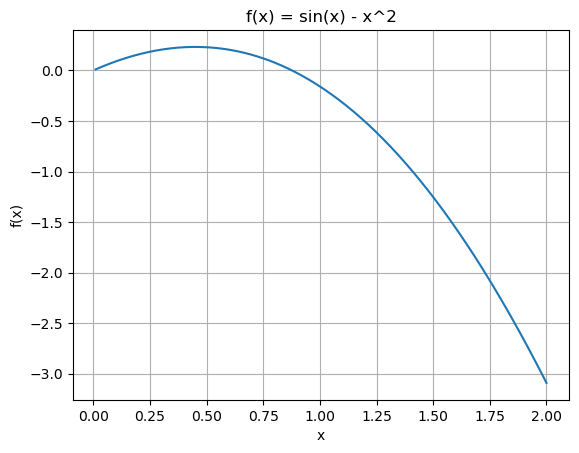

In [15]:
plot_function()

In [16]:
def bisection_method( xl, xu, es=1.e-7, maxit=30):
    """
    Uses the bisection method to estimate a root of func(x).
    The method is iterated until the relative error from
    one iteration to the next falls below the specified
    value or until the maximum number of iterations is
    reached first.
    Input:
        func = name of the function
        xl = lower guess
        xu = upper guess
        es = relative error specification  (default 1.e-7)
        maxit = maximum number of iterations allowed (default 30)
    Output:
        xm = root estimate
        fm = function value at the root estimate
        ea = actual relative error achieved
        i+1 = number of iterations required
        or
        error message if initial guesses do not bracket solution
    """
    def func(x):
        return math.sin(x) - x**2
    
    if func(xl)*func(xu) > 0:
        return 'initial estimates do not bracket solution'
    xmold = xl
    for i in range(maxit):
        xm = (xl+xu)/2
        ea = abs((xm-xmold)/xm)
        if ea < es:
            break
        if func(xm)*func(xl) > 0:
            xl = xm
        else:
            xu = xm
        xmold = xm
    return xm, ea, i+2



In [17]:
bisection_method(.01, 2)

(0.876726242005825, 6.76455416310783e-08, 26)